In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

import plotly.plotly as py
import plotly.graph_objs as go

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
links = pd.read_pickle('pkl/mvp_links.pkl')

tfidf = pd.read_pickle('tfidf.pkl')

nmf_embedding = pd.read_pickle('nmf.pkl')

# PCA (raw & nmf)

In [3]:
pca = PCA(n_components = 2, random_state = 42)
pca.fit(tfidf.toarray())
pcafeatures_train = pca.transform(tfidf.toarray())

In [4]:
raw_x2 = []
raw_y2 = []
for i in pcafeatures_train:
    raw_x2.append(i[0])
    raw_y2.append(i[1])

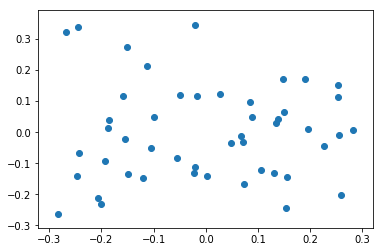

In [5]:
plt.scatter(raw_x2,raw_y2);

In [6]:
nmf_pca = PCA(n_components = 2, random_state = 42)
nmf_pca.fit(nmf_embedding)
nmf_pcafeatures_train = nmf_pca.transform(nmf_embedding)

In [7]:
nmf_x2 = []
nmf_y2 = []
for i in nmf_pcafeatures_train:
    nmf_x2.append(i[0])
    nmf_y2.append(i[1])

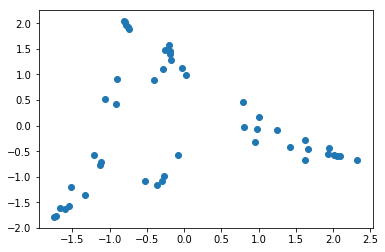

In [8]:
plt.scatter(nmf_x2, nmf_y2);

# plotly 3-D (raw & nmf)

## plot labels

In [9]:
topics = ['daytime, anxiety, depression',
          'nighttime, insomnia',
          'happy feelings, nerve pain',
          'creativity, chronic pain']

In [10]:
plot_strain_names = []
plot_strain_type = []
plot_topic = []

for name in links:
    plot_strain_names.append(name.split('/')[2].replace('-', ' '))
    plot_strain_type.append(name.split('/')[1])
    
for name in nmf_embedding:
    plot_topic.append(
        topics[name.argmax()]
    )

In [11]:
plot_text = []

count = 0
while count < len(plot_strain_names):
    plot_text.append(
        'Name: ' + plot_strain_names[count] + '<br>'
        + 'Species: ' + plot_strain_type[count] + '<br>'
        + 'Uses: ' + plot_topic[count]       
    )
    count += 1

In [12]:
plot_text[0]

'Name: blue dream<br>Species: hybrid<br>Uses: daytime, anxiety, depression'

## plotting

In [13]:
pca = PCA(n_components = 3, random_state = 42)
pca.fit(tfidf.toarray())
pcafeatures_train = pca.transform(tfidf.toarray())

In [14]:
raw_x3 = []
raw_y3 = []
raw_z3 = []
for i in pcafeatures_train:
    raw_x3.append(i[0])
    raw_y3.append(i[1])
    raw_z3.append(i[2])

In [15]:
trace = go.Scatter3d(
    x = raw_x3,
    y = raw_y3,
    z = raw_z3,
    text = plot_text,
    hoverinfo = 'none+none+none+text',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = nmf_embedding.argmax(axis=1),                
        colorscale = 'Greens',   
        opacity = 0.9
    )
)


plot_data = [trace]
layout = go.Layout(
    title = 'PCA on TF-IDF Output',
    margin = dict(
        l = 0,
        r = 0,
        b = 0,
        t = 0
    )
)
fig = go.Figure(data = plot_data, layout = layout)
py.iplot(fig)

In [18]:
nmf_pca = PCA(n_components = 3, random_state = 42)
nmf_pca.fit(nmf_embedding)
nmf_pcafeatures_train = nmf_pca.transform(nmf_embedding)

In [19]:
nmf_x3 = []
nmf_y3 = []
nmf_z3 = []
for i in nmf_pcafeatures_train:
    nmf_x3.append(i[0])
    nmf_y3.append(i[1])
    nmf_z3.append(i[2])

In [28]:
trace = go.Scatter3d(
    x = nmf_x3,
    y = nmf_y3,
    z = nmf_z3,
    text = plot_text,
    hoverinfo = 'none+none+none+text',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = nmf_embedding.argmax(axis=1),                
        colorscale = 'Jet',   
        opacity = 0.9
    )
)

plot_data = [trace]
layout = go.Layout(
    margin = dict(
        l = 0,
        r = 0,
        b = 0,
        t = 0
    )
)
fig = go.Figure(data = plot_data, layout = layout)
py.iplot(fig)

# Basic Recommender

In [13]:
npt = nmf_pcafeatures_train

In [14]:
def n_cosdist(target, array, n_recs):
    
    '''
    input target and array to get n cosine distances
    '''
    
    cos_distances = []
    
    for idx, vec in enumerate(array):
        tv = np.dot(target, vec)
        tv_norm = np.linalg.norm(target)*np.linalg.norm(vec)
        cos_distances.append((tv/tv_norm, idx))
        
    cos_distances = sorted(cos_distances, reverse = True)
    
    return cos_distances[1:n_recs+1]

In [15]:
def recommendations(target, names_array, model_transform, n_recs):
    
    '''
    input: product name as a string with all names available,
    model to transform with, and number of recs
    output: names of n top recommendations
    '''
    
    recs = []
    
    if target not in names_array:
        print("Sorry! I can't find '{}'.".format(target))
    
    for idx, name in enumerate(names_array):
        if name == target:
            recs = n_cosdist(target = model_transform[idx], array = model_transform, n_recs = n_recs)
            
    for idx, rec in enumerate(recs):
        print('Recommendation {}:'.format(idx+1) + '\n' + names_array[rec[1]])

In [17]:
recommendations('purple kush', plot_strain_names, npt, 3)

Recommendation 1:
master kush
Recommendation 2:
hindu kush
Recommendation 3:
la confidential
